# Clustering

Vamos a trabajar con el método K-means y evaluaremos las métricas vistas en la teoría.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>
Para empezar, vamos a generarnos una serie de <y>datasets sintéticos</y> con las funciones que ya vienen incorporadas en Scikit-learn. Notemos que estos datos vienen con una etiqueta asociada donde nos indica a qué cluster pertenecen. <y>La idea será</y> utilizar los métodos de clusting estudiados para poder <y>identificar los clusters</y> sin conocer esta etiqueta.

In [2]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

In [3]:
display(X1.shape)
display(X1[0:2,:])

(1000, 2)

array([[-1.87814945,  7.84977027],
       [ 0.72144399,  4.08475018]])

Grafiquemos los datasets para ver las diferencias entre cada uno.

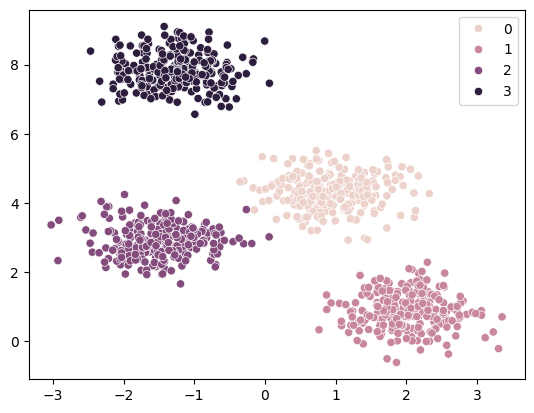

In [4]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

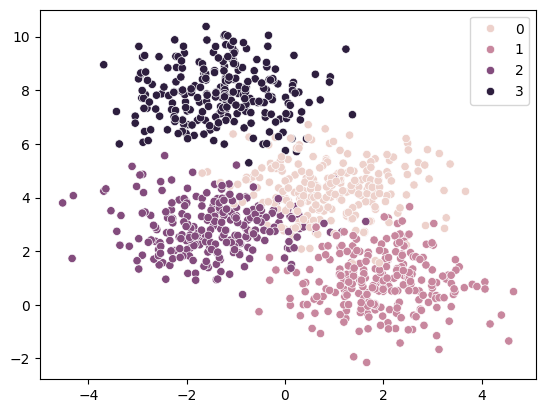

In [5]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

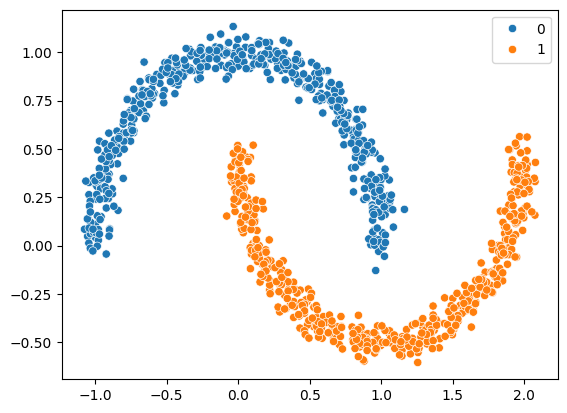

In [6]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

A simple vista, ¿Creen que K means es capaz de identificar correctamente los clusters en los 3 casos?

## K-means

Scikit-Learn tiene una implementación del método que vimos en la clase llamada KMeans.

1. Leer la documentación, siempre debería ser el primer paso. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2. Definimos los 3 modelos para los distintos datasets. Definir los parámetros n_clusters (según corresponda en cada caso basándose en los 3 gráficos de arriba) y un random_state=0 para que todos obtengamos resultados similares.

In [7]:
from sklearn.cluster import KMeans

kmeans_1 =  KMeans(n_clusters=4, random_state=0)
kmeans_2 =  KMeans(n_clusters=4, random_state=0)
kmeans_3 =  KMeans(n_clusters=2, random_state=0)

Entrenamos los modelos con los datos. En este paso hay una diferencia importante con lo que veníamos haciendo en aprendizaje supervisado. ¿Cuál es?

In [8]:
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

KMeans(n_clusters=2, random_state=0)

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>
Luego de entrenar los modelos, podemos consultar las etiquetas que se le asignó a cada instancia y el lugar de los centroides.  
<y>kmeans_1.labels_ = y1pred</y>

In [9]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(1000,)


In [10]:
np.unique(etiquetas_1)

array([0, 1, 2, 3])

Centroides:

In [11]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[-1.49807428  2.90164881]
 [-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [ 0.92917513  4.29023124]]


Completar la siguiente celda:

In [12]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

Ploteamos los resultados para todos los datasets. ¿Les parece que la separación fue adecuada?

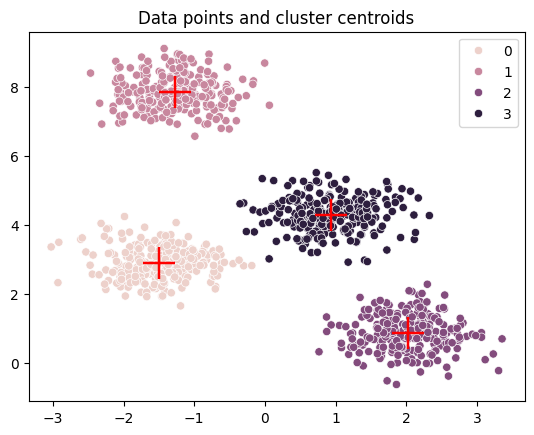

In [13]:
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue = etiquetas_1) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(x=centros_1[:, 0], y=centros_1[:, 1],color='Red', marker="+", s=500)
plt.title('Data points and cluster centroids')
plt.show()

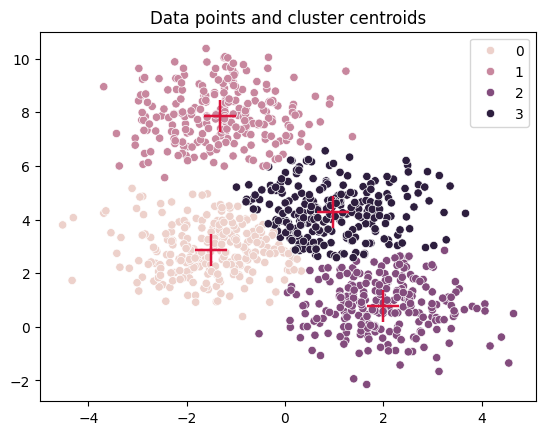

In [14]:
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue = etiquetas_2)
sns.scatterplot(x=centros_2[:, 0], y=centros_2[:, 1],color='crimson', marker="+", s=500)
plt.title('Data points and cluster centroids')
plt.show()

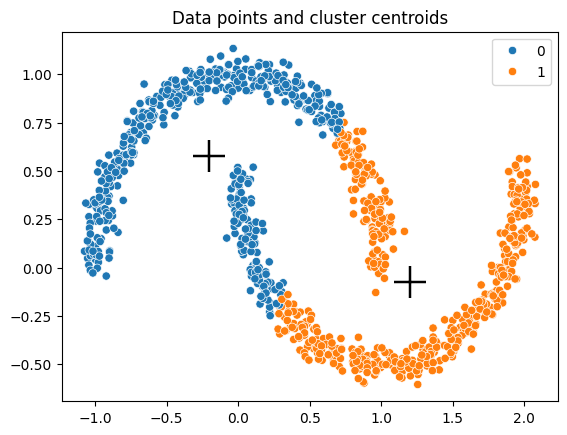

In [15]:
sns.scatterplot(x=X3[:, 0], y=X3[:, 1], hue = etiquetas_3)
sns.scatterplot(x=centros_3[:, 0], y=centros_3[:, 1],color='black', marker="+", s=500)
plt.title('Data points and cluster centroids')
plt.show()

¿ Qué pasa si no elegimos correctamente el número de clusters ?

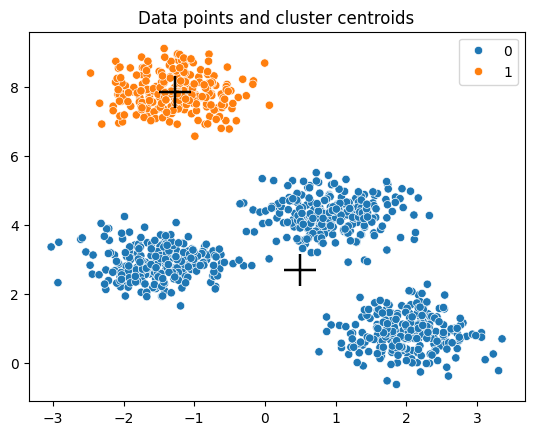

In [16]:
kmeans_1_mal = KMeans(2, random_state=0).fit(X1)
etiquetas_1_mal = kmeans_1_mal.labels_
centros = kmeans_1_mal.cluster_centers_


sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue = etiquetas_1_mal) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(x=centros[:, 0], y=centros[:, 1],color='black', marker="+", s=500)
plt.title('Data points and cluster centroids')
plt.show()

# Inercia

Vamos a evaluar las particiones que realizamos mediante KMeans usando la inercia. La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar. Queremos graficar esa curva para elegir el número de particiones óptimos con el metodo del codo.

Uno de los atributos de kmeans en sklearn es inertia (pueden ver la doc): 

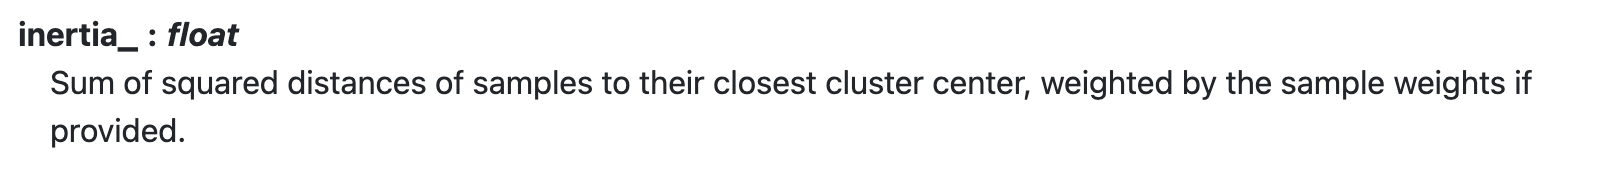

Utilizando este atributo:

- Aplicar a el dataset 1 (X1) Kmeans con distintos valores de K: de 2 a 12.
- En cada iteración almacenar el resultado de inertia_ en una lista con el nombre **lista_inercias**

In [17]:
K = np.arange(2,13)

In [18]:
#COMPLETAR
lista_inercias = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X1)
    lista_inercias.append(model.inertia_)

In [19]:
# Función para generar el inercias vs ks.
def kiner (X,K,rs=0) :

    iners = []

    for k in K:
        model = KMeans(n_clusters=k, random_state=0)
        model.fit(X)
        iners.append(model.inertia_)
    return iners

In [20]:
lista_inercias=kiner(X1,K)

Ahora graficamos la inercia por cantidad de clusters:

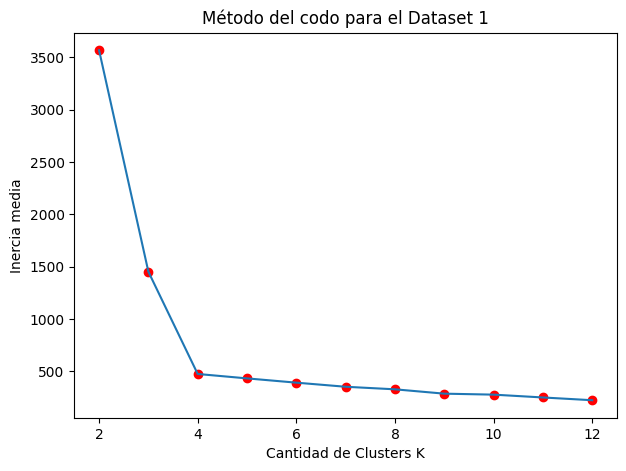

In [21]:
plt.figure(figsize = (7,5))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

¿Pueden ver el "codo"?

# Silhouette

Vamos a evaluar las particiones que realizamos mediante el valor de silhouette.

Vamos a calcular el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de inercia, vamos a recorrer con un for los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la inercia, vamos a calcular el valor de silhouette usando la función silhouette_score.


Importar silhouette_score

In [22]:
#COMPLETAR
from sklearn.metrics import silhouette_score

lista_silhouettes = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X1)
    lista_silhouettes.append(silhouette_score(X1, model.labels_))


In [23]:
# Función que genera silhouette por cada k.
from sklearn.metrics import silhouette_score

def silk(X,K,rs=0):
    sils = []

    for k in K:
        model = KMeans(n_clusters=k, random_state=0)
        model.fit(X)
        sils.append(silhouette_score(X, model.labels_))
    return sils

In [24]:
lista_silhouettes=silk(X1,K)

Ahora, de la misma forma que hicimos con el método del codo, calcular el silhouette score para cada valor de k (entre 2 y 12) para el dataset X1 y plotear.

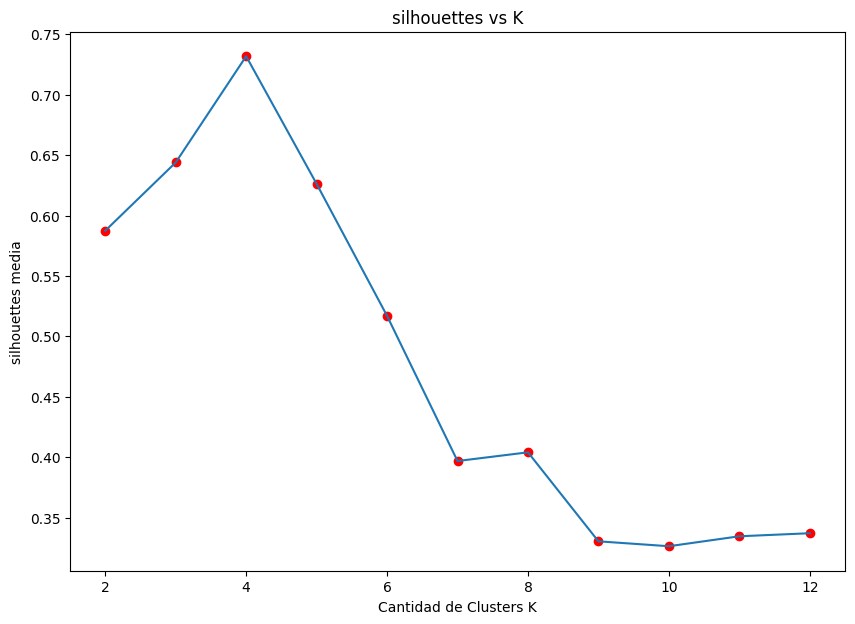

In [25]:
#COMPLETAR
plt.figure(figsize = (10,7))
plt.plot(K,lista_silhouettes)
plt.scatter(K,lista_silhouettes,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('silhouettes media')
plt.title('silhouettes vs K')

plt.show()


# Desafío

Aplicando lo que aprendimos hoy, segmentar el siguiente dataset:

In [26]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5' -O users.csv

In [27]:
# import pandas as pd

# df = pd.read_csv("https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5", sep='\t')
# df = df[["ID", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome",
#               "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
#               "MntSweetProducts", "NumWebPurchases"]]
# df.head()

In [28]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df = df[["ID", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome",
              "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
              "MntSweetProducts", "NumWebPurchases"]]
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,8
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,1
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,8
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,2
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,5


In [29]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Education         2240 non-null   object 
 2   Marital_Status    2240 non-null   object 
 3   Income            2216 non-null   float64
 4   Kidhome           2240 non-null   int64  
 5   Teenhome          2240 non-null   int64  
 6   Recency           2240 non-null   int64  
 7   MntWines          2240 non-null   int64  
 8   MntFruits         2240 non-null   int64  
 9   MntMeatProducts   2240 non-null   int64  
 10  MntFishProducts   2240 non-null   int64  
 11  MntSweetProducts  2240 non-null   int64  
 12  NumWebPurchases   2240 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 227.6+ KB


ID                   0
Education            0
Marital_Status       0
Income              24
Kidhome              0
Teenhome             0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
dtype: int64

In [30]:
df.isna().sum()*100 / df.shape[0]

ID                  0.000000
Education           0.000000
Marital_Status      0.000000
Income              1.071429
Kidhome             0.000000
Teenhome            0.000000
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
NumWebPurchases     0.000000
dtype: float64

In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2216 non-null   int64  
 1   Education         2216 non-null   object 
 2   Marital_Status    2216 non-null   object 
 3   Income            2216 non-null   float64
 4   Kidhome           2216 non-null   int64  
 5   Teenhome          2216 non-null   int64  
 6   Recency           2216 non-null   int64  
 7   MntWines          2216 non-null   int64  
 8   MntFruits         2216 non-null   int64  
 9   MntMeatProducts   2216 non-null   int64  
 10  MntFishProducts   2216 non-null   int64  
 11  MntSweetProducts  2216 non-null   int64  
 12  NumWebPurchases   2216 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 242.4+ KB


In [32]:
df.shape

(2216, 13)

- Year_Birth: Customer's birth year
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Recency: Number of days since customer's last purchase
- MntWines Amount spent on wine
- MntFruits: Amount spent on fruits

...


A tener en cuenta: En K means es importante escalar los datos.

##### Se elimnina la columna ID puesto que no es explicativa.

In [33]:
df = df.drop('ID', axis=1)

##### Se obtiene una lista con las columnas numéricas a escaclar o normalizar.

In [34]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
display(numeric_columns)

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases']

##### Se normalizan con scaler las variables numéricas.

In [35]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas para escalar
df2 = df.copy()

# Escalar los datos
scaler = StandardScaler()
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

# Ahora X_scaled contiene los datos escalados que puedes usar en KMeans

In [36]:
df2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,Graduation,Single,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,1.428553
1,Graduation,Single,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-1.125881
2,Graduation,Together,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,1.428553
3,Graduation,Together,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.760962
4,PhD,Married,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,0.333796


In [37]:
display(df2['Education'].unique())
display(df2['Marital_Status'].unique())

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [38]:
display(df2['Marital_Status'].value_counts()['YOLO'])
display(df2['Marital_Status'].value_counts()['Absurd'])

2

2

In [39]:
# Eliminar los registros donde "Marital_Status" sea "YOLO" o "Absurd"
df3 = df2[df2['Marital_Status'] != 'YOLO']
df3 = df3[df3['Marital_Status'] != 'Absurd']

In [40]:
display(df3['Marital_Status'].unique())

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [41]:
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

# Reemplazar las etiquetas por los valores codificados
df4=df3.copy()
df4['Education'].replace(education_order,inplace=True)

In [42]:
df4.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,3,Single,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,1.428553
1,3,Single,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-1.125881
2,3,Together,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,1.428553
3,3,Together,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.760962
4,5,Married,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,0.333796


In [43]:
display(df4['Marital_Status'].unique())

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [44]:
df4.shape

(2212, 12)

In [45]:
# Codificar las categorías de 'Marital_Status' usando OneHotEncoding en el mismo DataFrame
df4 = pd.get_dummies(df4, columns=['Marital_Status'], prefix='M', dtype=int,sparse=False)

In [46]:
df4.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,M_Alone,M_Divorced,M_Married,M_Single,M_Together,M_Widow
0,3,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,1.428553,0,0,0,1,0,0
1,3,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-1.125881,0,0,0,1,0,0
2,3,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,1.428553,0,0,0,0,1,0
3,3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.760962,0,0,0,0,1,0
4,5,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,0.333796,0,0,1,0,0,0


In [47]:
K = np.arange(2,51)

In [48]:
X=df4.values

In [49]:
X.shape

(2212, 17)

In [50]:
X[0:3,:]

array([[ 3.        ,  0.2340627 , -0.82303932, -0.92897224,  0.31053212,
         0.97822575,  1.54942946,  1.69022683,  2.45456767,  1.48482696,
         1.42855332,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 3.        , -0.23455948,  1.03993835,  0.90906569, -0.38050944,
        -0.87202383, -0.63732782, -0.71798612, -0.65103787, -0.63388018,
        -1.12588116,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.76947764, -0.82303932, -0.92897224, -0.79513438,
         0.35851074,  0.56915896, -0.17836803,  1.34020333, -0.14682107,
         1.42855332,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ]])

In [51]:
lista_inercias=kiner(X,K)

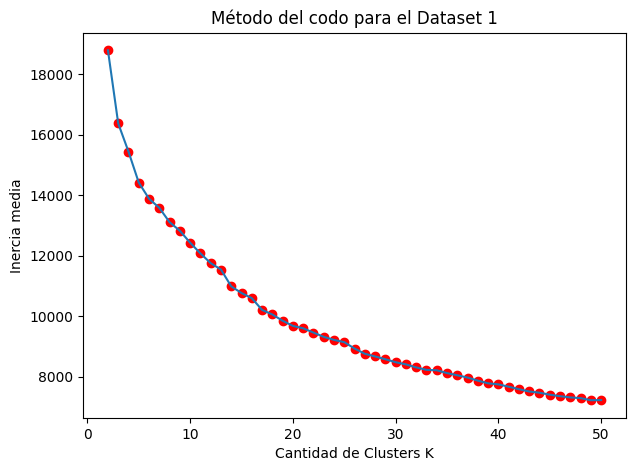

In [52]:
plt.figure(figsize = (7,5))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

In [53]:
lista_silhouettes=silk(X,K)

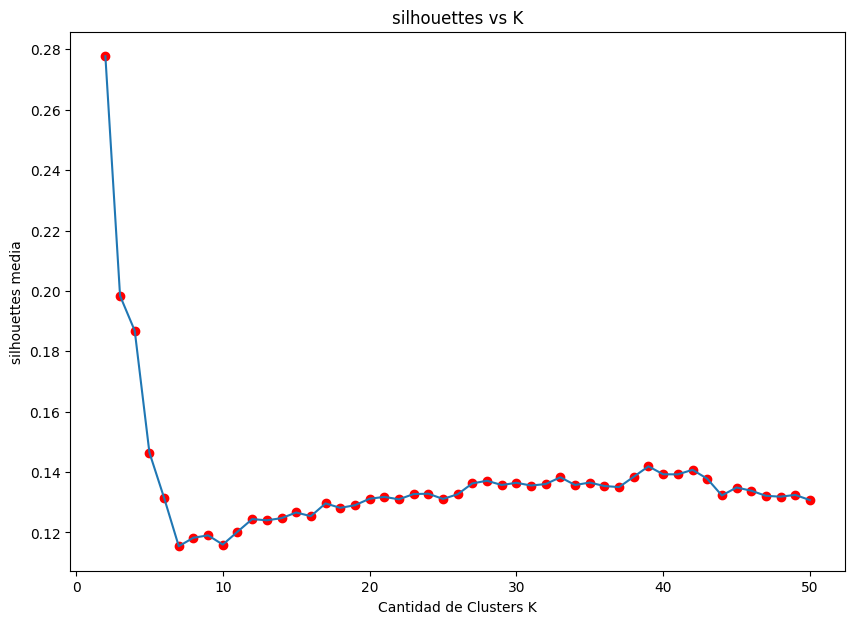

2

In [54]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_silhouettes)
plt.scatter(K,lista_silhouettes,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('silhouettes media')
plt.title('silhouettes vs K')

plt.show()

# Obtener el índice del valor máximo en lista1
id_max = lista_silhouettes.index(max(lista_silhouettes))

# Obtener el valor correspondiente en lista2
K_max = K[id_max]
K_max

In [55]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

KMeans(n_clusters=2, random_state=0)

In [56]:
# Obtener las etiquetas de los clusters asignados a cada muestra
df4['Cluster'] = model.labels_

In [57]:
np.unique(model.labels_)

array([0, 1])

In [58]:
df4.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,M_Alone,M_Divorced,M_Married,M_Single,M_Together,M_Widow,Cluster
0,3,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,1.428553,0,0,0,1,0,0,0
1,3,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-1.125881,0,0,0,1,0,0,1
2,3,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,1.428553,0,0,0,0,1,0,0
3,3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.760962,0,0,0,0,1,0,1
4,5,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,0.333796,0,0,1,0,0,0,1


#### Alternativa

In [62]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,8
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,8
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,2
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,5


In [63]:
# Eliminar los registros donde "Marital_Status" sea "YOLO" o "Absurd"
df = df[df['Marital_Status'] != 'YOLO']
df = df[df['Marital_Status'] != 'Absurd']

In [64]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
display(numeric_columns)
display(categorical_columns)

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases']

['Education', 'Marital_Status']

In [72]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Normalización de datos
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X = preprocessor.fit_transform(df)

# Obtener el nombre de las columnas después de la transformación
list_names = numeric_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

prefixs = {'Education':'Edu','Marital_Status':'MS'}

list_names = [next((e.replace(key, value) for key, value in prefixs.items() if e.startswith(key)), e) for e in list_names]

# Crear un DataFrame con los datos transformados
X_df = pd.DataFrame(X, columns=list_names)

# Mostrar el DataFrame
X_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,...,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
0,0.234515,-0.824288,-0.92886,0.309300,0.977586,1.550693,1.689878,2.465495,1.483638,1.428812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.233840,1.038148,0.90892,-0.381922,-0.871112,-0.636731,-0.717674,-0.651121,-0.634018,-1.124711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.769624,-0.824288,-0.92886,-0.796656,0.358390,0.570123,-0.178204,1.347180,-0.147201,1.428812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.016073,1.038148,-0.92886,-0.796656,-0.871112,-0.561303,-0.655256,-0.504457,-0.585336,-0.759922,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.240670,1.038148,-0.92886,1.553500,-0.391162,0.419267,-0.218330,0.155532,-0.001155,0.334445,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
K = np.arange(2,51)

In [67]:
lista_inercias=kiner(X,K)

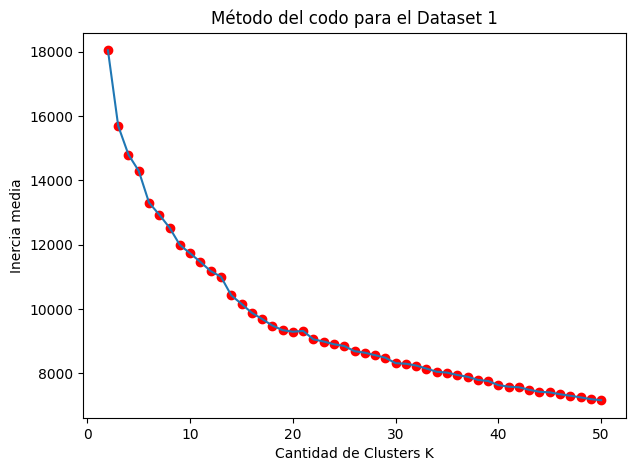

In [68]:
plt.figure(figsize = (7,5))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

In [69]:
lista_silhouettes=silk(X,K)

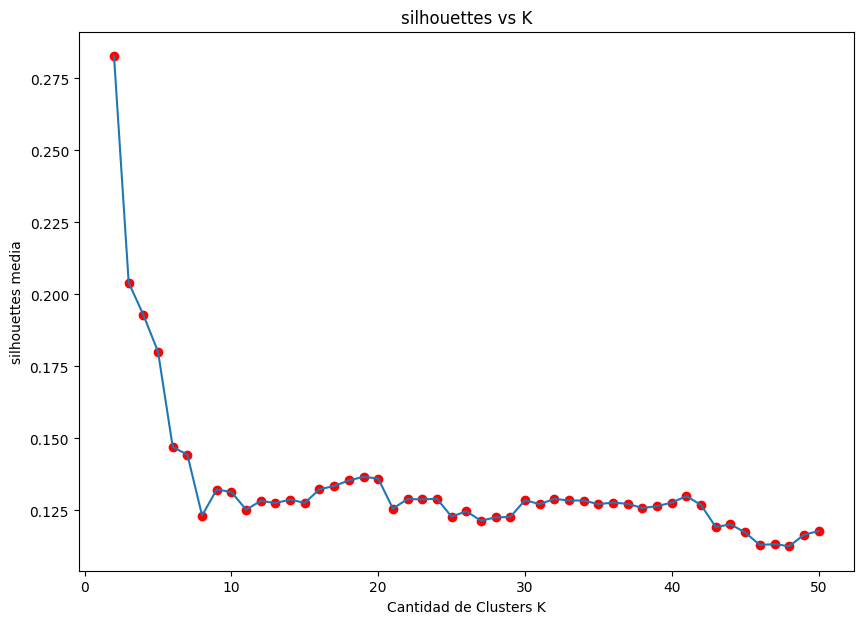

2

In [70]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_silhouettes)
plt.scatter(K,lista_silhouettes,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('silhouettes media')
plt.title('silhouettes vs K')

plt.show()

# Obtener el índice del valor máximo en lista1
id_max = lista_silhouettes.index(max(lista_silhouettes))

# Obtener el valor correspondiente en lista2
K_max = K[id_max]
K_max

In [71]:
X_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,...,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
0,0.234515,-0.824288,-0.92886,0.309300,0.977586,1.550693,1.689878,2.465495,1.483638,1.428812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.233840,1.038148,0.90892,-0.381922,-0.871112,-0.636731,-0.717674,-0.651121,-0.634018,-1.124711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.769624,-0.824288,-0.92886,-0.796656,0.358390,0.570123,-0.178204,1.347180,-0.147201,1.428812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.016073,1.038148,-0.92886,-0.796656,-0.871112,-0.561303,-0.655256,-0.504457,-0.585336,-0.759922,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.240670,1.038148,-0.92886,1.553500,-0.391162,0.419267,-0.218330,0.155532,-0.001155,0.334445,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_df.to_csv('k-means-desafio.csv',index=False)